## Installations

In [1]:
#pip install Pillow
#pip install rembg


## Importing modules

In [2]:
#### Importing libraries
import requests
import numpy as np
from rembg import remove
from PIL import Image
from io import BytesIO

In [3]:
import pooch

In [4]:
# Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
import cv2
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

## Removing the background

In [5]:
def loading_removing_background(url):
    '''
    Tuned for GitHub URLs of image files. Converts into raw URL, imports
    image from raw URL, removes the background, returns processed image.
    '''
    raw_url = url + '?raw=true'
    page = requests.get(raw_url)
    input_image = Image.open(BytesIO(page.content))
    output_image = remove(input_image)
    output_image = cv2.cvtColor(np.array(output_image), cv2.COLOR_RGB2BGR)
    return output_image

In [163]:
# Calling the function
#url = 'https://github.com/seblap86/mold_detection/blob/main/prototype/test_images/lemon.png'
url = 'https://s3.amazonaws.com/photography.prod.demandstudios.com/b0f1bc83-e648-4b8e-aa9b-acc352f159c1.jpg'
output = loading_removing_background(url)
#output

#### Some reshaping for whatever reason

In [164]:
#output = output.reshape(output.shape[0] * output.shape[1], output.shape[2])

In [165]:
#color_count = len(np.unique(output, axis=0))
#color_count

In [166]:
#output

## Importing the image into CV2

In [167]:
# Some styling stuff
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue', 'xkcd:scarlet']

In [168]:
'''
The main idea is that it is possible to use the image as a (N_rows X N_columns X N_channels) vector. 
Considering this vector, it is possible to apply the K Means algorithm and identify k clusters, that will be our colors.

https://towardsdatascience.com/image-color-identification-with-machine-learning-and-image-processing-using-python-f3dd0606bdca
'''

'\nThe main idea is that it is possible to use the image as a (N_rows X N_columns X N_channels) vector. \nConsidering this vector, it is possible to apply the K Means algorithm and identify k clusters, that will be our colors.\n\nhttps://towardsdatascience.com/image-color-identification-with-machine-learning-and-image-processing-using-python-f3dd0606bdca\n'

In [169]:
# Functions
#def get_image(): # Gets the image
#    image = cv2.imread(image_path)
#    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#    return image

def RGB2HEX(color): # Gets the HEX code of a... pixel((?))
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [170]:
def get_image():
    open_cv_image = np.array(output)
    image = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2RGB)
    return image

In [171]:
# Loading the image
image = get_image()
#image = output

In [172]:
# Investigations - RGB format? (yes)
image[300]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [173]:
# Height (in pixels) = Rows / first list elements of the array
len(image) 

3456

In [174]:
len(image[0]) # Width (in pixels) = "Pixel row" of each height row / secondary elements of the array

5184

## Removing black background

In [175]:
image[0]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [176]:
image[0][0]

array([0, 0, 0], dtype=uint8)

In [177]:
non_background_pixels = []
i = 0
for height_pixel in image:
    for width_pixel in height_pixel:
        if width_pixel[0] > 25 and width_pixel[1] > 25 and width_pixel[2] > 25: # For now, 25 seems a safe threshold
            non_background_pixels.append(list(width_pixel))
            #print(width_pixel)
        #if width_pixel == ''
    #print(height_pixel[i])
    #i += 1
len(non_background_pixels)

5831736

## Clustering the colors

In [178]:
number_of_colors = 5
#modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(non_background_pixels)

/Users/dominik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [179]:
counts = Counter(labels)
center_colors = clf.cluster_centers_

# Getting ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

## Plotting the colors (centroids)

([<matplotlib.patches.Wedge at 0x2b08477f0>,
 [Text(0.6857944604156527, 0.8600499741661549, '#423c37'),
  Text(-0.8835375485011674, 0.6552567438710931, '#95887c'),
  Text(-0.8477522923846161, -0.7009394059094042, '#2b2622'),
  Text(0.37610087021464117, -1.0337060198256514, '#5b5450'),
  Text(1.0485991114213915, -0.3323249968423508, '#776f69')])

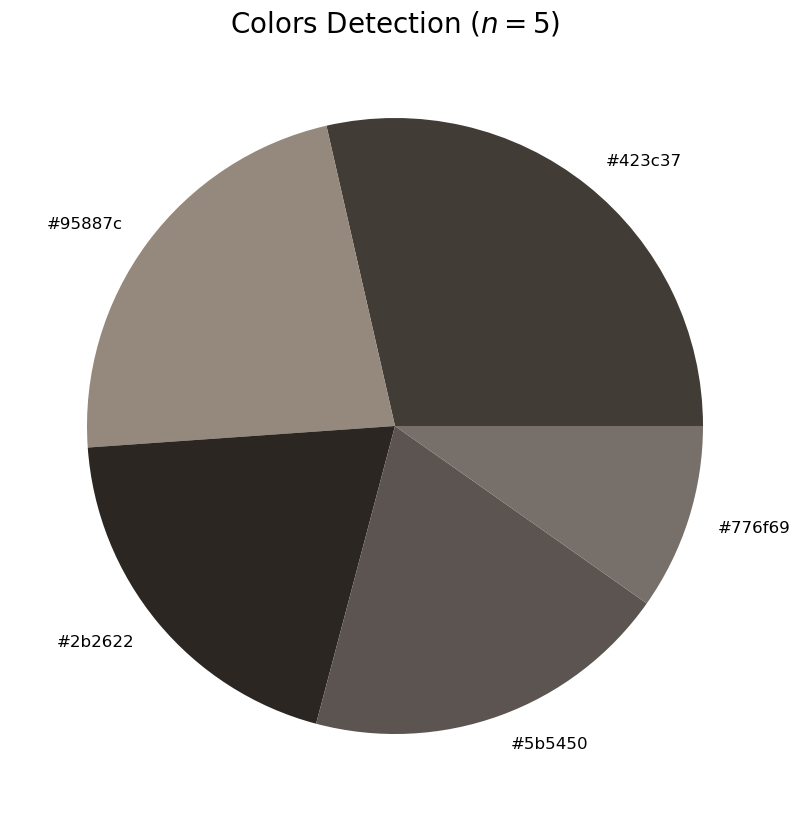

In [180]:
# Plotting the colors
plt.title(f'Colors Detection ($n={number_of_colors}$)', fontsize=20)
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

In [181]:
#median +-15

In [182]:
set_pixels=[]
for i in non_background_pixels:
  if len(set(i))<3:
    set_pixels.append(set(i))

In [183]:
mold=[]
no_mold=[]
for pixel_set in set_pixels:
    if len(pixel_set) == 2:
        a, b = pixel_set
        if abs(a - b) < 15:
            print("mold")
            mold.append(pixel_set)
        else:
            print("no mold")
            no_mold.append(pixel_set)

/var/folders/1x/nk1pmjs57kd0k7pp1vkgtk7w0000gn/T/ipykernel_98163/4091554038.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  if abs(a - b) < 15:


no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
mold
mold
mold
mold
mold
mold
mold
mold
mold
mold
mold
mold
mold
mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
mold
mold
mold
mold
no mold
no mold
no mold
no mold
no mold
mold
mold
mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
mold
mold
no mold
no mold
no mold
no mold
no mold
no mold
mold
mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
mold
mold
mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
mold
mold
mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
mold
mold
no mold
no mold
no mold
mold
mold
mold
no mold
no mold
no mold
mold
mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
mold
mold
mold
mold
no mold
no mold
mold
no mold
no mold
no mold
no mold
mold
no m

no mold
no mold
no mold
no mold
mold
mold
mold
no mold
no mold
mold
no mold
no mold
mold
mold
mold
mold
no mold
mold
mold
mold
mold
mold
no mold
no mold
mold
mold
no mold
mold
no mold
mold
mold
no mold
mold
mold
mold
no mold
no mold
no mold
mold
no mold
mold
mold
no mold
mold
no mold
mold
no mold
no mold
no mold
no mold
no mold
no mold
mold
mold
no mold
no mold
no mold
no mold
no mold
mold
mold
no mold
no mold
no mold
no mold
no mold
mold
mold
mold
no mold
no mold
no mold
mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
mold
no mold
no mold
no mold
no mold
mold
mold
no mold
mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
mold


mold
mold
mold
no mold
no mold
no mold
no mold
no mold
mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
no mold
mold
no mold
mold
mold
mold
mold
no mold
no mold
no mold
no mold
no mold
mold
no mold
mold
no mold
no mold
no mold
no mold
no mold
no mold
mold
mold
mold
mold
no mold
no mold
no mold
no mold
mold
no mold
no mold
mold
mold
mold
mold
mold
mold
mold
no mold
no mold
mold
no mold
no mold
no mold
mold
no mold
no mold
mold
no mold
no mold
mold
mold
mold
no mold
no mold
mold
mold
mold
no mold
mold
no mold
mold
mold
no mold
mold
no mold
mold
no mold
no mold
no mold
mold
no mold
no mold
no mold
mold
no mold
no mold
no mold
mold
mold
mold
no mold
mold
mold
no mold
no mold
no mold
no mold
mold
mold
no mold
no mold
no mold
no mold
mold
no mold
no mold
no mold
mold
no mold
mold
mold
mold
mold
mold
mold
mold
mold
mold
no mold
mold
no mold
no mold
no mold
mold
no mold
mold
mold
no mold
no mold
no mold
no mold
no mold
mold
no mold
no

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [184]:
len(mold)

223765

In [185]:
len(no_mold)

330520

In [186]:
len(mold)/len(no_mold)

0.6770089555851385